In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#import cv2
import os
import PIL
from PIL import Image
from unidecode import unidecode
from tensorflow.keras.preprocessing.image import ImageDataGenerator


ModuleNotFoundError: No module named 'unidecode'

In [2]:
dados = pd.read_excel('wclasses.xlsx')


In [3]:
len(dados)

81444

In [4]:
classesList =["Abstrac_Expressionism","Art_Nouveau_Modern","Baroque","Color_Field_Painting","Cubism","Early_Renaissance",
"Expressionism", "Fauvismo","High_Renaissance","Impressionism","Mannerism_Late_Renaissance","Minimalism",
"Naive_Art_Primitivism","Northen_Renaissance","Pop_Art","Post_Impressionism","Realism","Rococo","Romanticism","Symbolism",
"Ukiyo_e"]

In [39]:
#impor_membros= dados["file"].str.contains(*classesList)

mask = dados.iloc[:, 0].str.contains(r'\b(?:{})\b'.format('|'.join(classesList)))
df1 = dados[~mask]
len(df1)


8000

In [40]:
df1.head(20)

,file,artist,genre,style
8,Northern_Renaissance/albrecht-durer_deposition...,25,136,157
31,Northern_Renaissance/albrecht-durer_apostle-ba...,25,136,157
46,Northern_Renaissance/albrecht-durer_laughing-p...,25,135,157
60,Northern_Renaissance/albrecht-durer_portrait-o...,25,135,157
61,Northern_Renaissance/albrecht-durer_the-penite...,25,131,157
70,Northern_Renaissance/albrecht-durer_portrait-o...,25,135,157
100,Northern_Renaissance/albrecht-durer_the-great-...,25,131,157
125,Northern_Renaissance/albrecht-durer_portrait-o...,25,135,157
147,Northern_Renaissance/albrecht-durer_portrait-o...,25,135,157
166,Northern_Renaissance/albrecht-durer_portrait-o...,25,135,157


In [41]:
# Arrumar o nome dos arquivos que tem acento
f = r"C:/Users/biamc/Documents/Insper/Machine Learning/SArt"
for img_p in range(df1.shape[0]):
    img_path = df1.iloc[img_p, 0]
    if "Ã¢Â\xa0" in img_path:
        img_path = img_path.replace('Ã¢Â', '\u00E2')
        temp_path = img_path.replace('\u00E2', 'a') 
        df1.iat[img_p, 0] = temp_path
        img_path = f  + "/" + img_path
        temp_path = f  + "/" + temp_path
        # os.rename(u'{0}'.format(img_path), temp_path)
        img_path = temp_path
    
    df1.iat[img_p, 3] = df1.iloc[img_p, 3]-140
    img = Image.open(img_path)
    img = img.resize((256,256))
    img.save(img_path)
    
    # C:/Users/biamc/Documents/Insper/Machine Learning/SArt/Pointillism/georges-lacombeâ _oaks-and-blueberry-bushes-1905.jpg
    #                                                                   georges-lacombeâ _oaks-and-blueberry-bushes-1905.jpg

In [42]:
train = df1.sample(frac=0.8,random_state=200)
test = df1.drop(train.index)

In [43]:
print(df1.iloc[10, 3])

17


In [44]:
im = cv2.imread(train.iloc[4, 0])
print(im.shape)
# print(train.iloc[0, 0])

(256, 256, 3)


In [45]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  r'C:\Users\biamc\Documents\Insper\Machine Learning\SArt',
  labels='inferred',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(256, 256),
  batch_size=32)

Found 81444 files belonging to 31 classes.
Using 65156 files for training.


In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

alpha = 1e-1

def get_Lasso(degree):
    pipe = Pipeline([
        ("poly_features", PolynomialFeatures(
            degree=degree,
            include_bias=False,
        )),
        ("std_scaler", StandardScaler()),
        ("lin_reg", Lasso(alpha=alpha)()),
    ])
    return pipe

def get_Ridge(degree):
    pipe = Pipeline([
        ("poly_features", PolynomialFeatures(
            degree=degree,
            include_bias=False,
        )),
        ("std_scaler", StandardScaler()),
        ("lin_reg", Ridge(alpha=alpha)),
    ])
    return pipe

def get_ElaticNet(degree):
    pipe = Pipeline([
        ("poly_features", PolynomialFeatures(
            degree=degree,
            include_bias=False,
        )),
        ("std_scaler", StandardScaler()),
        ("lin_reg", ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=RAND_SEED)),
    ])
    return pipe

def outro_experimento(msg, pipeline, X_train, y_train, X_test, y_test):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_pred, y_test))

    model = pipeline.named_steps['lin_reg']
    print(f'{msg}:')
    print(f'intercept = {model.intercept_}')
    print(f'coefs = {model.coef_}')
    print(f'RMSE: {RMSE}')
    print()

In [55]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(27))

In [56]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 flatten_5 (Flatten)         (None, 230400)           

In [20]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

In [57]:
target_size=(256,256) # set the size of the images
color_mode='rgb' # set the type of image
class_mode= 'categorical' # set the class mode
batch_size=32  # set the batch size
subset='training' # set to 'training', or 'valiatiom' or leave as None

train_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()
train_imgs= train_gen.flow_from_dataframe(dataframe=train, 
          x_col='file',
          y_col=['style'],
          target_size=target_size,color_mode=color_mode,
          class_mode='raw', batch_size=batch_size,shuffle=True, seed=123,
          subset='training')
test_imgs= test_gen.flow_from_dataframe(dataframe=test, 
          x_col='file',
          y_col=['style'],
          target_size=target_size,color_mode=color_mode,
          class_mode='raw', batch_size=batch_size,shuffle=True, seed=123,
          subset='training')

Found 6400 validated image filenames.
Found 1600 validated image filenames.


In [49]:
test.head()

,file,artist,genre,style
46,Northern_Renaissance/albrecht-durer_laughing-p...,25,135,17
273,Northern_Renaissance/albrecht-durer_adam-and-e...,25,136,17
302,Analytical_Cubism/pablo-picasso_clarinet-1911.jpg,15,138,2
523,Northern_Renaissance/albrecht-durer_two-castle...,25,137,17
648,Northern_Renaissance/albrecht-durer_st-george-...,25,136,17


In [50]:
train.head()

,file,artist,genre,style
18175,Northern_Renaissance/albrecht-durer_dead-blueb...,0,139,17
78398,Fauvism/charles-lapicque_bateau-sur-la-lagune-...,0,139,10
71978,Abstract_Expressionism/elaine-de-kooning_portr...,0,139,0
6566,Pointillism/camille-pissarro_portrait-of-nini-...,2,135,18
29226,Pointillism/georges-seurat_suburb-1882.jpg,47,130,18


In [58]:
import scipy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
train_labels = train["style"].to_numpy()
test_labels = test["style"].to_numpy()
print(type(train_labels))

history = model.fit(train_imgs, epochs=10, 
                    validation_data=(test_imgs))

<class 'numpy.ndarray'>
Epoch 1/10
200/200 [==============================] - 245s 1s/step - loss: 22.4092 - accuracy: 0.3698 - val_loss: 2.7110 - val_accuracy: 0.0344
Epoch 2/10
200/200 [==============================] - 240s 1s/step - loss: 2.0984 - accuracy: 0.1150 - val_loss: 1.7407 - val_accuracy: 0.1306
Epoch 3/10
200/200 [==============================] - 240s 1s/step - loss: 1.6128 - accuracy: 0.6697 - val_loss: 1.7142 - val_accuracy: 0.8744
Epoch 4/10
200/200 [==============================] - 247s 1s/step - loss: 1.4124 - accuracy: 0.7800 - val_loss: 1.8437 - val_accuracy: 0.8512
Epoch 5/10
200/200 [==============================] - 240s 1s/step - loss: 1.3422 - accuracy: 0.7536 - val_loss: 2.4988 - val_accuracy: 0.7419
Epoch 6/10
200/200 [==============================] - 239s 1s/step - loss: 1.1732 - accuracy: 0.7070 - val_loss: 2.6621 - val_accuracy: 0.7294
Epoch 7/10
200/200 [==============================] - 239s 1s/step - loss: 1.4751 - accuracy: 0.6862 - val_loss: 3.58

50/50 - 14s - loss: 4.4206 - accuracy: 0.6375 - 14s/epoch - 287ms/step


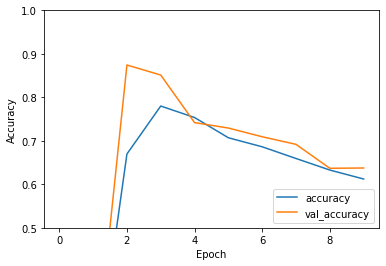

In [60]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_imgs, verbose=2)